In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    ConfusionMatrixDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
breast_cancer_data = pd.read_csv("breast_cancer.csv", encoding="utf-8")

print(breast_cancer_data.info())
print("\n")
print(breast_cancer_data.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# PRÉ-PROCESSAMENTO 1 - Retirando colunas irrelevantes:
breast_cancer_data.drop('id', axis=1, inplace=True)

In [7]:
# PRÉ-PROCESSAMENTO 2 - Convertendo coluna de tipo object:
le = LabelEncoder()
breast_cancer_data['diagnosis'] = le.fit_transform(
    breast_cancer_data['diagnosis']
)

In [8]:
x = breast_cancer_data.drop('diagnosis', axis=1)
y = breast_cancer_data['diagnosis']

In [9]:
# PRÉ-PROCESSAMENTO 3 = Normalizando os dados:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [10]:
# O modelo será treinado com vários algoritmos, para comparar sua performance.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

modelos = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC()
}


Naive Bayes
Acurácia: 0.94
Precisão: 0.92
Recall: 0.93
F1 Score: 0.92


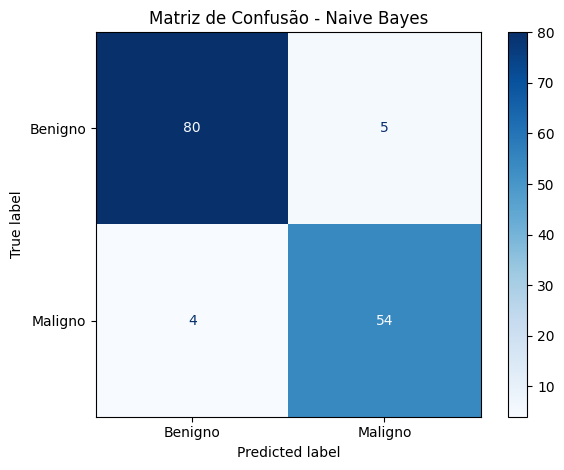


Decision Tree
Acurácia: 0.93
Precisão: 0.88
Recall: 0.97
F1 Score: 0.92


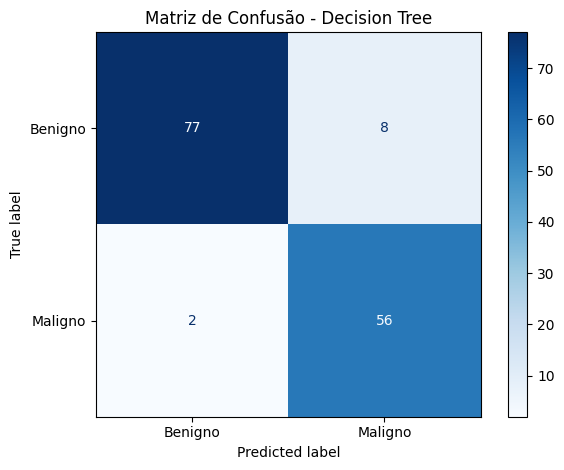


Random Forest
Acurácia: 0.96
Precisão: 0.92
Recall: 0.98
F1 Score: 0.95


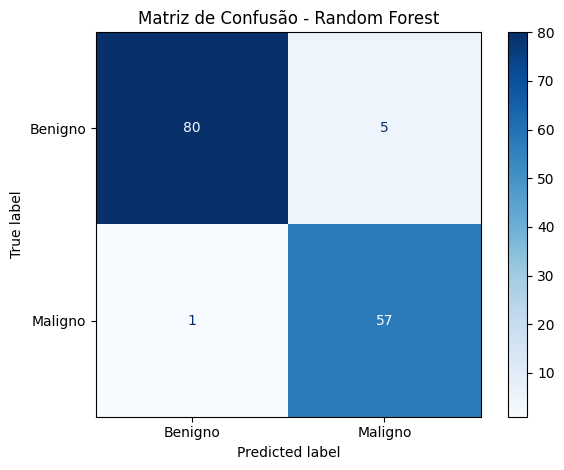


KNN
Acurácia: 0.97
Precisão: 1.00
Recall: 0.93
F1 Score: 0.96


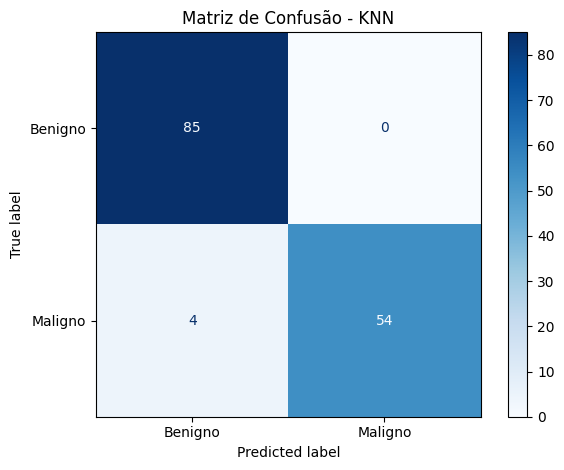


Logistic Regression
Acurácia: 0.97
Precisão: 0.95
Recall: 0.98
F1 Score: 0.97


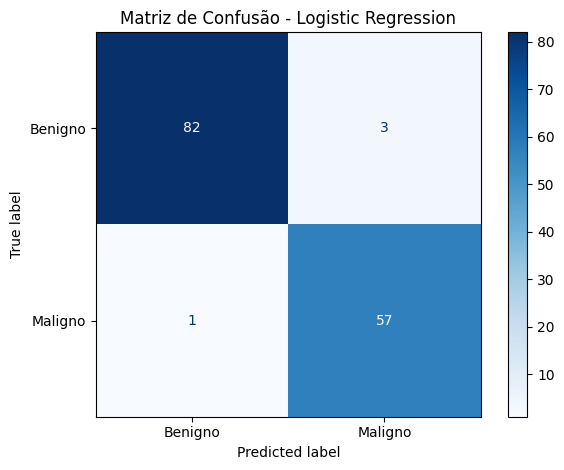


SVM
Acurácia: 0.97
Precisão: 0.97
Recall: 0.97
F1 Score: 0.97


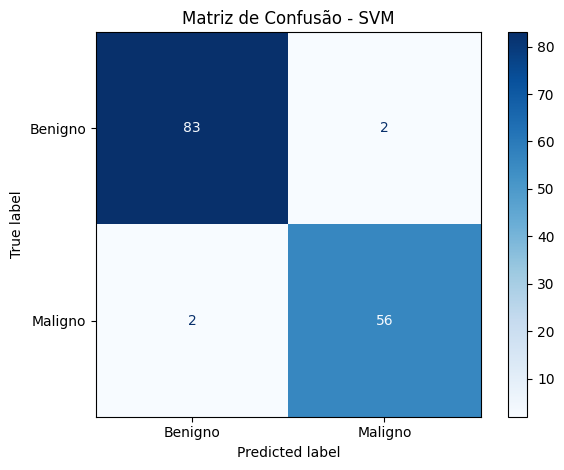

In [13]:
# PRINTANDO RESULTADOS DE CADA ALGORITMO
for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    model_accuracy = accuracy_score(y_test, y_pred)
    model_precision = precision_score(y_test, y_pred)
    model_recall = recall_score(y_test, y_pred)
    model_f1 = f1_score(y_test, y_pred)

    print(f"\n{nome}")
    print(f"Acurácia: {model_accuracy:.2f}")
    print(f"Precisão: {model_precision:.2f}")
    print(f"Recall: {model_recall:.2f}")
    print(f"F1 Score: {model_f1:.2f}")

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Benigno', 'Maligno'], cmap='Blues')
    plt.title(f'Matriz de Confusão - {nome}')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

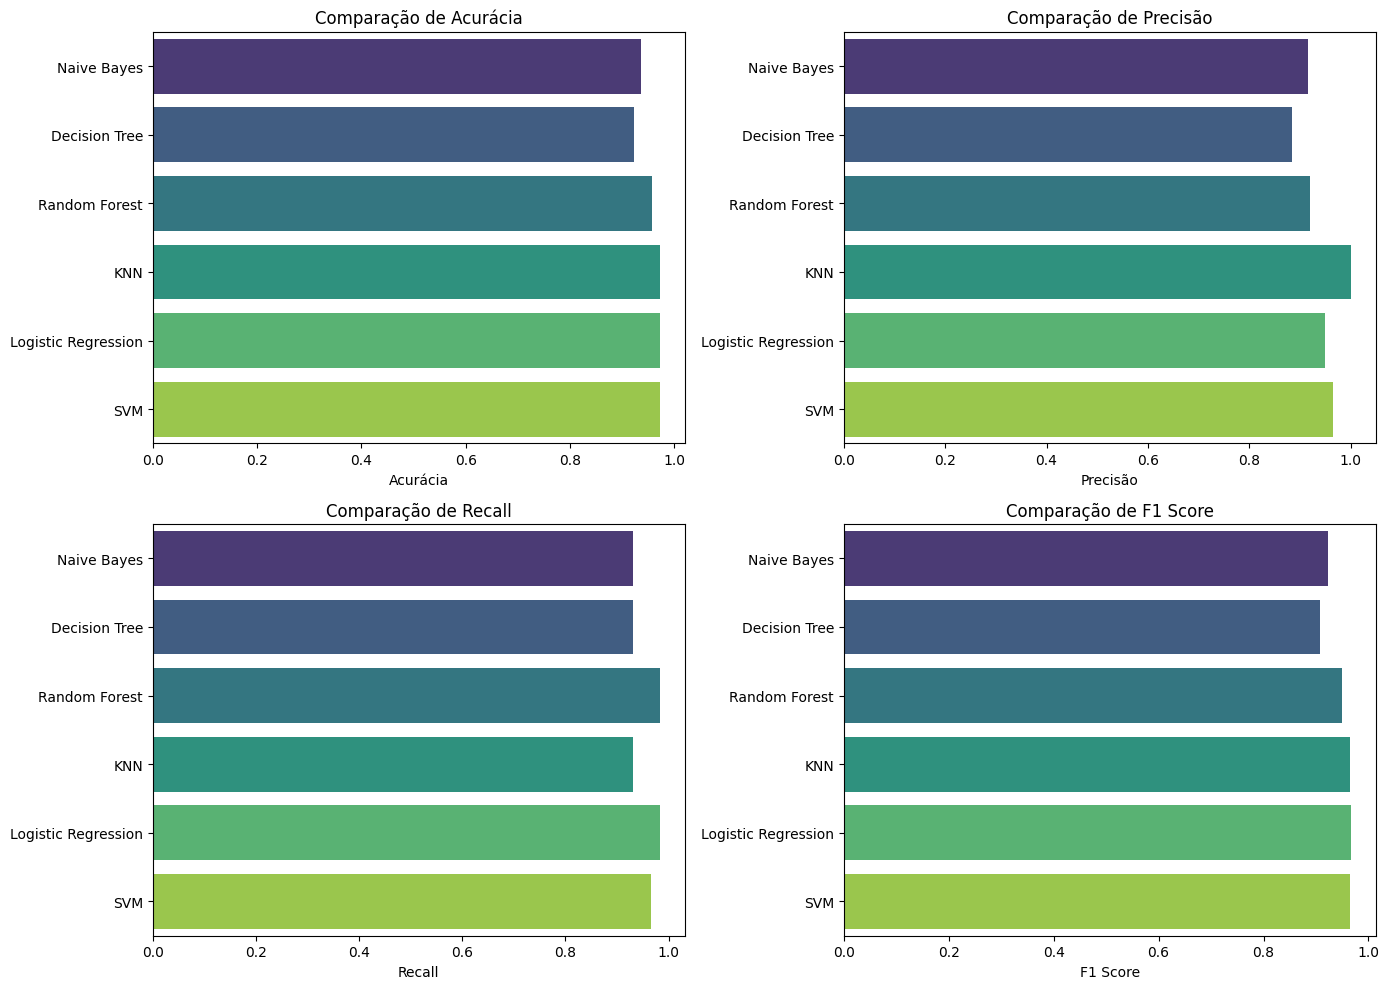

In [20]:
resultados = {
    "Algoritmo": [],
    "Acurácia": [],
    "Precisão": [],
    "Recall": [],
    "F1 Score": []
}

for nome, modelo in modelos.items():
    modelo.fit(x_train, y_train)
    y_pred = modelo.predict(x_test)

    resultados["Algoritmo"].append(nome)
    resultados["Acurácia"].append(accuracy_score(y_test, y_pred))
    resultados["Precisão"].append(precision_score(y_test, y_pred))
    resultados["Recall"].append(recall_score(y_test, y_pred))
    resultados["F1 Score"].append(f1_score(y_test, y_pred))

df_resultados = pd.DataFrame(resultados)

plt.figure(figsize=(14, 10))
metricas = ["Acurácia", "Precisão", "Recall", "F1 Score"]

for i, metrica in enumerate(metricas, 1):
    plt.subplot(2, 2, i)
    sns.barplot(
        data=df_resultados,
        x=metrica,
        y="Algoritmo",
        hue="Algoritmo",
        palette="viridis",
        legend=False
    )
    plt.title(f"Comparação de {metrica}")
    plt.xlabel(metrica)
    plt.ylabel("")

plt.tight_layout()
plt.show()